In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
dados = pd.read_csv('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Classificação/WineQT.csv', sep=',')
dados.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dados_atributos_scaled = scaler.fit_transform(dados)

# Tratamento de valores ausentes (se necessário)
# Você pode usar SimpleImputer para preencher valores ausentes com a média, mediana, etc.
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
dados_atributos_imputed = imputer.fit_transform(dados_atributos_scaled)

In [ ]:
from imblearn.over_sampling import SMOTE

dados_atributos = dados.drop(columns = ['quality', 'Id'])
dados_classes = dados['quality']

#Construir um objeto a partir do smote
resampler = SMOTE()

#Executar o balanceamento
dados_atributos_b, dados_classes_b = resampler.fit_resample(dados_atributos, dados_classes)

from collections import Counter
classes_count = Counter(dados_classes_b)
classes_count_n = Counter(dados_classes)
print("Classes antes do balanceamento: ", classes_count_n)
print("Classes depois do balanceamento: ", classes_count)

dados_atributos_b = pd.DataFrame(dados_atributos_b)
dados_classes_b = pd.DataFrame(dados_classes_b)
dados_finais = dados_atributos_b.join(dados_classes_b, how ='left')
print(dados_finais)

Classes antes do balanceamento:  Counter({5: 483, 6: 462, 7: 143, 4: 33, 8: 16, 3: 6})
Classes depois do balanceamento:  Counter({5: 483, 6: 483, 7: 483, 4: 483, 8: 483, 3: 483})
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0          7.400000          0.700000     0.000000        1.900000   0.076000   
1          7.800000          0.880000     0.000000        2.600000   0.098000   
2          7.800000          0.760000     0.040000        2.300000   0.092000   
3         11.200000          0.280000     0.560000        1.900000   0.075000   
4          7.400000          0.700000     0.000000        1.900000   0.076000   
...             ...               ...          ...             ...        ...   
2893       8.801089          0.411956     0.434240        1.800000   0.069207   
2894       9.270169          0.320773     0.540958        2.774034   0.079654   
2895       7.286123          0.371388     0.305694        1.913877   0.063751   
2896      1

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split



atributos_train, atributos_test, classes_train, classes_test = train_test_split(dados_atributos_b, dados_classe_b, test_size = 0.3)

forest = RandomForestClassifier()

#Treinar o modelo
wine_quality_forest  = forest.fit(atributos_train, classes_train)

#Pretestar o modelo
Classe_test_predict = wine_quality_forest .predict(atributos_test)

#Comparar as classes inferidas no teste com as classes preservadas

i = 0
for i in range(0, len(classes_test)):
  print(classes_test.iloc[i], ' - ', Classe_test_predict[i])

#Acuracia global do modelo
from sklearn import metrics
print('Acuracia global (provisoria):', metrics.accuracy_score(classes_test, Classe_test_predict))
#0.864367816091954

7  -  7
3  -  3
4  -  4
5  -  6
5  -  5
3  -  3
5  -  6
7  -  7
6  -  6
8  -  8
6  -  7
4  -  4
5  -  5
5  -  5
4  -  4
3  -  3
7  -  6
4  -  4
3  -  3
6  -  6
5  -  6
4  -  4
4  -  4
5  -  7
3  -  3
5  -  5
6  -  6
5  -  5
5  -  5
8  -  8
5  -  5
5  -  6
6  -  7
8  -  8
4  -  4
7  -  7
6  -  6
8  -  8
5  -  5
6  -  7
7  -  7
7  -  7
4  -  4
6  -  6
5  -  5
4  -  4
8  -  8
3  -  3
8  -  8
5  -  6
5  -  5
3  -  3
7  -  7
6  -  6
8  -  8
4  -  4
8  -  8
6  -  6
3  -  3
7  -  7
5  -  6
3  -  3
7  -  7
3  -  3
7  -  7
3  -  3
4  -  4
8  -  8
7  -  7
3  -  3
8  -  8
3  -  3
7  -  7
7  -  7
7  -  7
6  -  6
7  -  7
7  -  7
4  -  4
8  -  8
8  -  8
5  -  5
8  -  8
4  -  4
4  -  4
7  -  7
8  -  8
3  -  3
6  -  4
3  -  3
4  -  4
5  -  5
5  -  5
7  -  7
8  -  8
4  -  4
7  -  7
8  -  8
8  -  8
6  -  4
3  -  3
6  -  6
8  -  8
7  -  7
5  -  6
3  -  3
6  -  5
8  -  8
5  -  5
7  -  7
7  -  7
4  -  4
5  -  5
4  -  4
6  -  7
5  -  5
4  -  4
6  -  6
6  -  8
3  -  3
5  -  5
7  -  7
7  -  7
7  -  7
5  -  6


In [ ]:
#Avaliação da acuracia com cross-validation
from pprint import pprint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression


forest = RandomForestClassifier(random_state=42)


wine_quality_forest_cross = forest.fit(dados_atributos_b, dados_classes_b)

#3. Avaliar a acuracia com cross-validation
from sklearn.model_selection import cross_validate, cross_val_score
scoring = ['precision_macro', 'recall_macro']
scores_cross = cross_validate(forest, dados_atributos_b, dados_classes_b, cv=10, scoring=scoring)


#print(scores_cross)
print(scores_cross['test_precision_macro'].mean())
print(scores_cross['test_recall_macro'].mean())




#0.8054014666778186
#0.8144912131519273

<ipython-input-41-833a43804ae6>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  wine_quality_forest_cross = forest.fit(dados_atributos_b, dados_classes_b)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was ex

0.8054014666778186
0.8144912131519273


In [ ]:
from pickle import dump
dump(wine_quality_forest, open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Classificação/wine_quality_forest_class.pkl', 'wb'))
dump(wine_quality_forest_cross, open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Classificação/wine_quality_forest_cross_class.pkl', 'wb'))

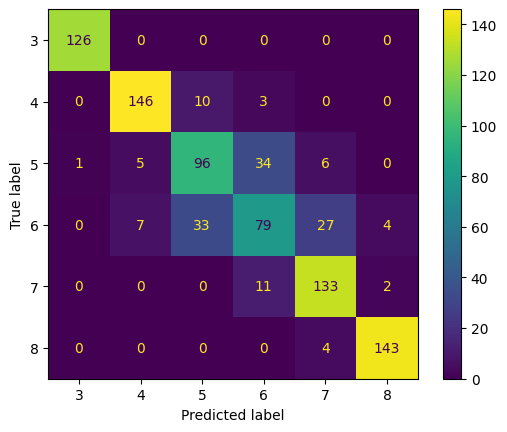

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm = confusion_matrix(classes_test, Classe_test_predict)

#Matriz de contingência modo gráfico
grafico = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=wine_quality_forest.classes_)
grafico.plot()

In [ ]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 3)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 3)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

from sklearn.model_selection import GridSearchCV
from pprint import pprint


random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}


"""
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth}
"""

pprint(random_grid)
rf_grid = GridSearchCV(forest, random_grid, refit=True, verbose=2)

#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2)

#rf_grid.fit(dados_atributos_b, dados_classes_b)

#print(rf_grid.best_params_)

{'bootstrap': [True, False],
 'max_depth': [10, 60, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}


In [ ]:
# LINHA NOVA{'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
#Avaliação da acuracia com cross-validation
from pprint import pprint

#1. Quando a avaliação é realizada com cross_validation, dispensa-se o split da base
from sklearn.ensemble import RandomForestClassifier
#Construir um objeto para responder o indutor
forest = RandomForestClassifier(bootstrap = False, max_depth = 10, max_features= 'sqrt', min_samples_leaf= 2, min_samples_split= 2, n_estimators = 100) # Construir o objeto indutor


#3. Avaliar a acuracia com cross-validation
from sklearn.model_selection import cross_validate, cross_val_score
scoring = ['precision_macro', 'recall_macro']
scores_cross = cross_validate(forest, dados_atributos_b, dados_classes_b, cv=10, scoring=scoring)
#print(scores_cross)
print(scores_cross['test_precision_macro'].mean())
print(scores_cross['test_recall_macro'].mean())

wine_quality_forest = forest.fit(dados_atributos_b, dados_classes_b)

dump(wine_quality_forest, open('/content/drive/MyDrive/Trabalho Avaliativo 1 BIM - sistemas inteligentes/Classificação/wine_quality_forest.pkl', 'wb'))
#0.795497491747394
#0.8034438775510203




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

0.7919813583504098
0.8010274943310657


<ipython-input-60-a0262f088dd2>:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  wine_quality_forest = forest.fit(dados_atributos_b, dados_classes_b)


In [ ]:
nova_inst = [7.4,	0.7,	0.0,	1.9,	0.076,	11.0,	34.0,	0.9978,	3.51,	0.56,	9.4,	5,	0]

template = ["fixed acidity",	"volatile acidity",	"citric acid",	"residual sugar",	"chlorides",	"free sulfur dioxide",	"total sulfur dioxide",	"density",	"pH",	"sulphates",	"alcohol",	"quality", "Id"]


nova_inst_df = pd.DataFrame(columns = template)
nova_inst_df.loc[0]=nova_inst
nova_inst_df = nova_inst_df.drop(columns = ['Id'])
display(nova_inst_df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [ ]:
#normalizando

dados_atributos_nova_inst = nova_inst_df.drop(columns = ['quality'])
dados_classes_nova_inst = nova_inst_df['quality']
print(wine_quality_forest.predict(dados_atributos_nova_inst).mean())
wine_quality_forest.predict_proba(dados_atributos_nova_inst)

5.0


array([[0.07619395, 0.15801508, 0.61175066, 0.13133354, 0.02270678,
        0.        ]])